Full Image

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
full = cv2.imread('unicon.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

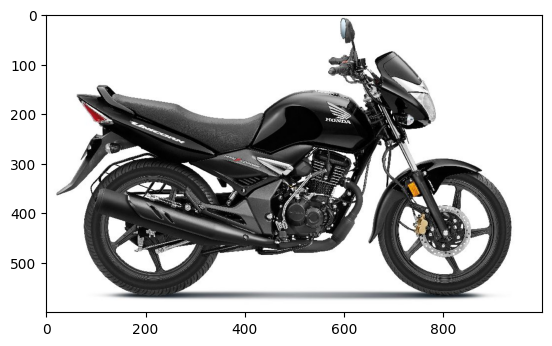

In [3]:
plt.imshow(full)

Template image 
- A subset of the image. Note how its actually the exact image.Later on we'll discuss more advance methods for general matching, such as the facial recognition 

In [4]:
face  = cv2.imread('disk_plate.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


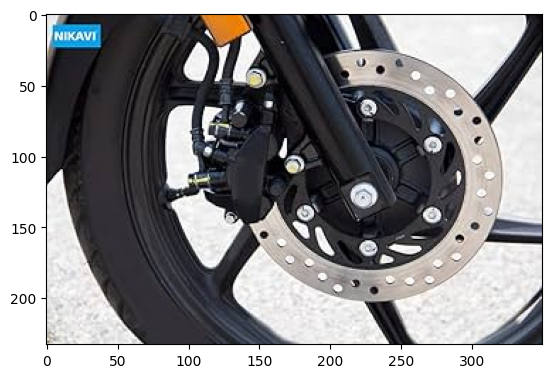

In [5]:
plt.imshow(face)

Template matching method 

In [6]:
# Use eval function 
sum([1,2,3])

6

In [7]:
mystring = 'sum'

In [8]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [9]:
myfunc = eval(mystring)

In [10]:
myfunc([1,2,3])

6

In [11]:
height, width, channels = face.shape

In [12]:
width

350

In [13]:
height

233

In [14]:
channels

3

In [15]:
# The full image from scratch 
full = cv2.imread('unicon.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

# the template to match 
face = cv2.imread('disk_plate.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

#All the 6 method for comparison in a list 
# note how we are using string, later on we'll use eval() function to convert function 
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

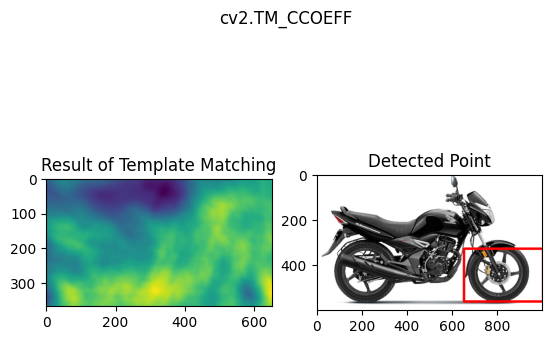

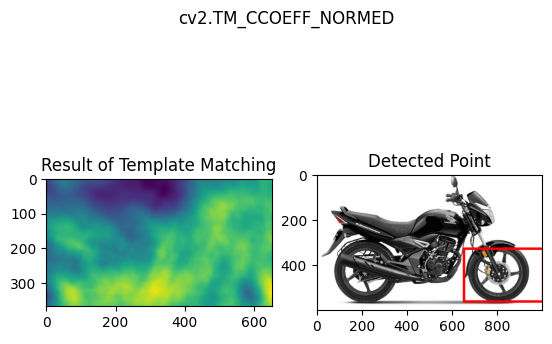

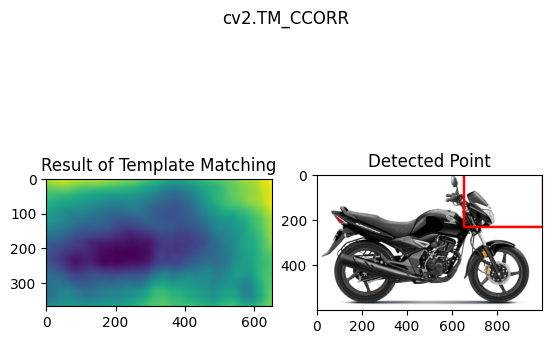

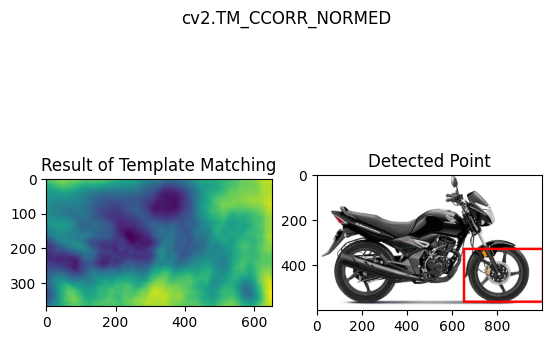

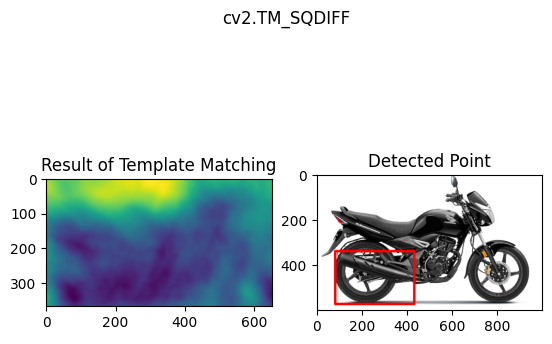

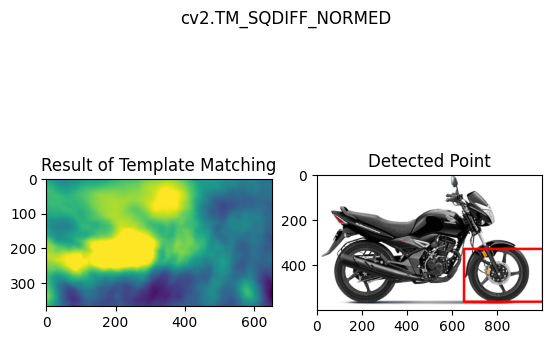

In [16]:
for m in methods:

    # create   a copy of the image 
    full_copy = full.copy()

    # Get the actual function instead of the string 
    method = eval(m)

    # Apply template Matching with the method 
    res = cv2.matchTemplate(full_copy, face, method)

    # grab the max and min values plus their location 
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # set up drawing of Rectangle 

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum 
    # Notice the coloring on the last 2 lef hand side images
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Assign the bottom right of the Rectangle 
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red rectangle
    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)

    #plot the Images 
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)

    plt.show()
    print('\n')
    print('\n')


In [17]:
#Done